# <center>Network Science</center>

## <center>Home Assignment #2: Network models</center>

### <center>Student: *{Your Name}*</center>

#### <hr /> General Information

**Due Date:** 28.02.2016 23:59 <br \>
**Late submission policy:** -0.2 points per day <br \>


Please send your reports to <mailto:network.hse.2016@gmail.com> with message subject of the following structure:<br \> **[HSE Networks 2015] *{LastName}* *{First Name}* HA*{Number}***

Support your computations with figures and comments. <br \>
If you are using IPython Notebook you may use this file as a starting point of your report.<br \>
<br \>
<hr \>

## Problems

### Task 1

Consider Barabasi and Albert dynamical grow model. Two main ingredients of this model are *network growing* and *prefferential attachment*. Implement two restricted B&A-based models:
<br \>

**Model A**
<br \>
Lack of prefferential attachment, that is at each time-step form edges uniformly at random while network keeps growing.

**Model B**
<br \>
Lack of growing, that is fix total number of nodes, on each time-step randomly choose one and form edges with prefferential attachment.
<br \>

1. Generate networks according to the models above ($N > 1000$ nodes)
2. Compute CDF/PDF, describe the distribution and compute\describe its properties.
3. Illustate the following dependencies: 
    * average path length to the number of nodes
    * average clustering coefficient to the number of nodes
    * average node degee to the nodes "age"
4. Is scale-free property conserved in these models?

Analyse results with respect to various parameter settings

### <hr /> Task 2

Consider the following  "Vertex copying model" of growing network.

At every time step a random vertex from already existing vertices is selected and duplicated together with all edges, such that  every edge of the  vertex
* is copied with probability $q$
* is rewired to any other randomly selected vertex with probability $1-q$


Starting state is defined by some small number of randomly connected vertices.

The model can generate both directed and undirected networks.

1. Generate  graphs based on the model ($N > 1000$ nodes)
2. Compute CDF/PDF, describe the distribution and compute\describe its properties.
3. Illustate the following dependencies: 
    * average path length to the number of nodes
    * average clustering coefficient to the number of nodes
    * average node degee to the nodes "age"
    
Analyse results with respect to various parameter settings

In [5]:
import networkx as nx
import random
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

#Task 1

In [6]:

def modelA(n0, m, t):
    G = nx.Graph()
    G.add_nodes_from(list(range(n0)))

    for i in range(n0, t + n0):
        mrandomnodes = random.sample(G.nodes(), m)
        G.add_node(i)
        for nodes in mrandomnodes:
            G.add_edge(i, nodes)
    return G

def modelB(n, m, t):
    G = nx.Graph()
    G.add_nodes_from(range(n))
    nodes = G.nodes()
    for i in range(t):
        vertex = random.randint(0, n-1)
        neighbors = G.neighbors(vertex)
        
        l = [node for node in nodes if node != vertex ] #and node not in neighbors
        M = random.randint(0, m)
        targets= random.sample(l, M)
        G.add_edges_from(zip([vertex]*M,targets))
        nodes.extend(targets)
        nodes.extend([vertex]*M)
    return G

def pdfcdf(G):
    degrees = list(G.degree().values())
    
    #pdf
    pdf = np.zeros(max(degrees) + 1)
    for elem in degrees:
        pdf[elem] += 1
    pdf = np.array([i/len(degrees) for i in pdf])
    
    #cdf
    cdf = np.zeros(max(degrees) + 1)
    cdf[0] = pdf[0]
    for i in range(1, len(pdf)):
        cdf[i] = cdf[i - 1] + pdf[i]
    return pdf, cdf

def maxcomponent(G):
    components = nx.connected_components(G)
    maxim = 0
    for comp in components:
        if len(comp) > maxim:
            maxim = len(comp)
            G2 = G.subgraph(comp)
    return G2

In [18]:
G = modelA(11, 10, 10000)

In [5]:
G2 = modelB(10000, 10, 10000)

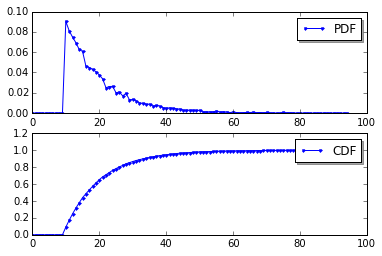

In [58]:
pdf, cdf = pdfcdf(G)

plt.subplot(211)
plt.plot(pdf, '.-', label = 'PDF')
plt.legend(loc='upper right', shadow=True)

plt.subplot(212)
plt.plot(cdf, '.-', label = 'CDF')
plt.legend(loc='upper right', shadow=True)

It is look like exponential distribution. To check it let's scale y axex in log way and will have seen that the line is straight

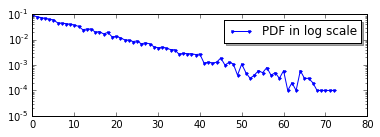

In [79]:
plt.subplot(212)
plt.yscale('log')
plt.plot(pdf[pdf != 0], '.-', label = 'PDF in log scale')
plt.legend(loc='upper right', shadow=True)

It is straight line. Lel's find coefficient alpha and corresponding theoretical destribution. And let's plot in one figure.

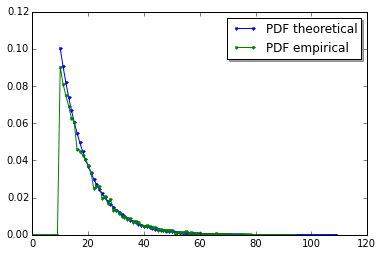

In [117]:
alpha = 1/np.mean(np.array(list(G.degree().values()))-10)
x = np.array(range(100))
y = alpha*np.exp(-alpha*x)
plt.plot(x + 10, y,  '.-', label = 'PDF theoretical')
plt.plot(pdf, '.-', label = 'PDF empirical')
plt.legend(loc='upper right', shadow=True)

In [118]:
alpha

0.10022024226649315

average path length 

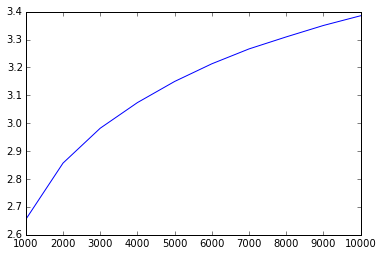

In [14]:
i = 1000
x = []
y = []
while i <= 10000:
    G = modelA(10, 10, i)
    x.append(i)
    y.append(nx.average_shortest_path_length(G))
    i += 1000
plt.plot(x, y)

Here we can see that the average path is growing when the number of nodes is growing, but the coefficient m is stable.

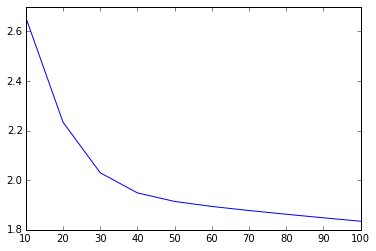

In [9]:
i = 10
x = []
y = []
while i <= 100:
    G = modelA(i, i, 1000)
    x.append(i)
    y.append(nx.average_shortest_path_length(G))
    i += 10
plt.plot(x, y)

Here we can see that the average path is decreasing when the coefficient m is growing and the number of nodes is stable

clustering coefficient

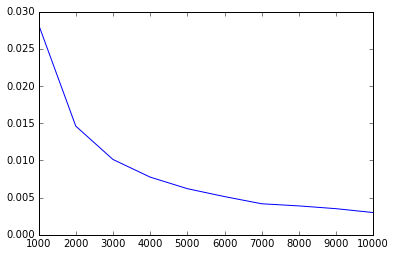

In [15]:
i = 1000
x = []
y = []
while i <= 10000:
    G = modelA(10, 10, i)
    x.append(i)
    y.append(nx.average_clustering(G))
    i += 1000
plt.plot(x, y)

The clustering coeficient is decreasing when the number of nodes is growing and the coefficient m is stable

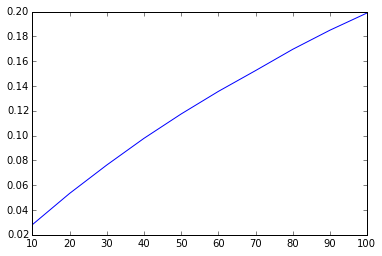

In [10]:
i = 10
x = []
y = []
while i <= 100:
    G = modelA(i, i, 1000)
    x.append(i)
    y.append(nx.average_clustering(G))
    i += 10
plt.plot(x, y)

The clustering coefficient is growing when the coefficient m is growing and the number of nodes is stable

average node degee to the nodes "age"

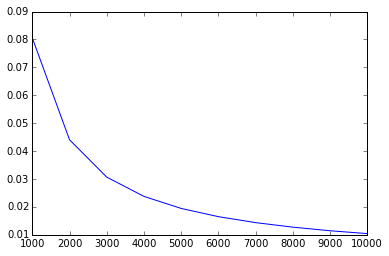

In [16]:
i = 1000
x = []
y = []
while i <= 10000:
    G = modelA(10, 10, i)
    x.append(i)
    l = list(G.degree().values())
    y.append(np.mean([l[i]/(len(l) - i + 1) for i in range(12, len(l))]))
    i += 1000
plt.plot(x, y)

This parameter is decreasing when the number of nodes is growing

Let's consider the model B

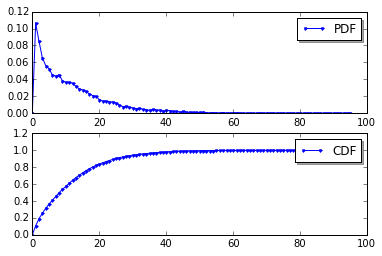

In [203]:
pdf, cdf = pdfcdf(G2)

plt.subplot(211)
plt.plot(pdf, '.-', label = 'PDF')
plt.legend(loc='upper right', shadow=True)

plt.subplot(212)
plt.plot(cdf, '.-', label = 'CDF')
plt.legend(loc='upper right', shadow=True)


It is look like exponential distribution. To check it let's scale y axex in log way and will have seen that the line is straight

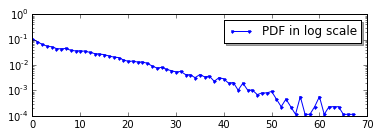

In [204]:
plt.subplot(212)
plt.yscale('log')
plt.plot(pdf[pdf != 0], '.-', label = 'PDF in log scale')
plt.legend(loc='upper right', shadow=True)

It is straight line. Lel's find coefficient alpha and corresponding theoretical destribution. And let's plot in one figure.

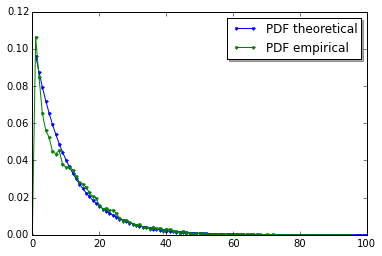

In [210]:
alpha = 1/np.mean(np.array(list(G2.degree().values()))-1)
x = np.array(range(100))
y = alpha*np.exp(-alpha*x)
plt.plot(x +1, y,  '.-', label = 'PDF theoretical')
plt.plot(pdf, '.-', label = 'PDF empirical')
plt.legend(loc='upper right', shadow=True)

In [211]:
alpha

0.096292714023498899

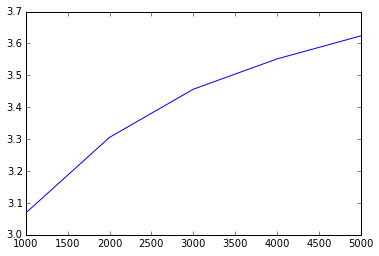

In [24]:
i = 1000
x = []
y = []
while i <= 5000:
    G = modelB(i, 10, i)
    G = maxcomponent(G)
    x.append(i)
    y.append(nx.average_shortest_path_length(G))
    i += 1000
plt.plot(x, y)

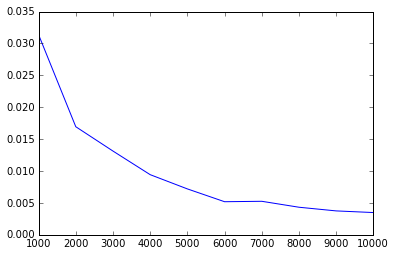

In [3]:
i = 1000
x = []
y = []
while i <= 10000:
    G = modelB(i, 10, i)
    G = maxcomponent(G)
    x.append(i)
    y.append(nx.average_clustering(G))
    i += 1000
plt.plot(x, y)

We can see the all parameters in model A and B is not free-scale.

#Task 2

In [8]:
def modelC(n, q):
    G = nx.path_graph(10)
    for i in range(10, n):
        node = random.randint(0, i - 1)
        G.add_node(i)
        neighbors = G.neighbors(node)
        r2 = len(neighbors)
        neighbors2 = random.sample(neighbors, int(r2*q))
        r = len(neighbors2)
        G.add_edges_from(zip([i]*r, neighbors2))
        G.add_edges_from(zip([i]*(r2-r), random.sample(list(range(i)), r2-r)))
    return G
            

In [46]:
G = modelC(10000, 0.7)

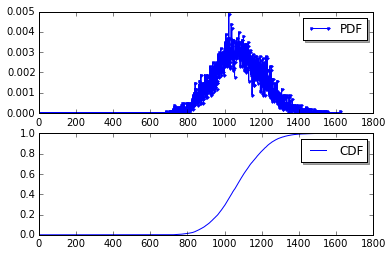

In [52]:
pdf, cdf = pdfcdf(G)

plt.subplot(211)
plt.plot(pdf, '.-', label = 'PDF')
plt.legend(loc='upper right', shadow=True)

plt.subplot(212)
plt.plot(cdf, '-', label = 'CDF')
plt.legend(loc='upper right', shadow=True)

It is looks like normal distribution.

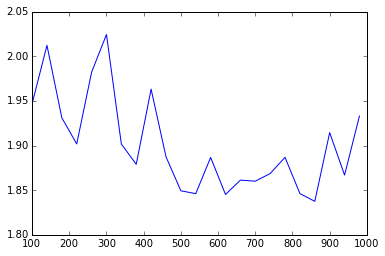

In [60]:
i = 100
x = []
y = []
while i <= 1000:
    G = modelC(i, 0.7)
    x.append(i)
    y.append(nx.average_shortest_path_length(G))
    i += 40
plt.plot(x, y)

We can see that the average path is stable from 1.8 to 2. So this parametr is scale-free

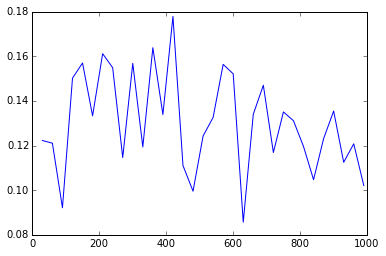

In [65]:
i = 30
x = []
y = []
while i <= 1000:
    G = modelC(i, 0.7)
    x.append(i)
    y.append(nx.average_clustering(G))
    i += 30
plt.plot(x, y)

We can see that the clustering coefficient is stable from 0.08 to 0.18. So this parametr is scale-free

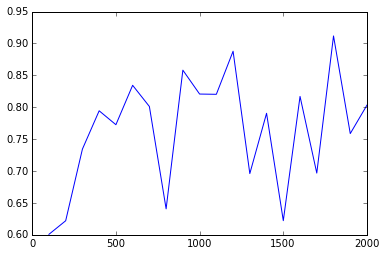

In [12]:
i = 100
x = []
y = []
while i <= 2000:
    G = modelC(i, 0.7)
    x.append(i)
    l = list(G.degree().values())
    y.append(np.mean([l[i]/(len(l) - i + 1) for i in range(12, len(l))]))
    i += 100
plt.plot(x, y)

We can see that average node degee to the nodes "age" is stable from 0.6 to 0.9. So this parametr is scale-free

Despite the fact that in all pictures we can see fluctuations all parameters is scale-free